In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['DATAA.csv', 'DATAB.csv']


In [2]:
data = pd.read_csv("input/DATAB.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06,8.140504e+06
mean,4.827466e+01,6.148474e+00,6.780973e-01,1.537854e-01,3.972614e+01,4.494898e+00,3.887709e+02,7.560775e+02,4.967658e+02,8.415290e+02,8.847748e+02,1.896904e+03,4.981671e+02,1.059170e+03,1.233047e+02,5.275766e+02,3.716440e+02,2.561013e+03,4.507059e+02,8.357789e+03
std,8.704727e+00,1.080325e+00,5.086267e-01,3.965277e-01,8.999721e+00,4.231636e+00,5.965966e+01,1.939159e+02,8.810599e+01,7.050512e+01,1.512532e+02,7.629134e+02,1.261030e+02,2.260708e+02,3.419379e+01,1.652516e+02,7.198826e+01,1.029855e+03,8.199752e+01,1.523958e+03
min,2.885000e+01,3.960000e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,1.000000e+03,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,2.084052e+02,1.305100e+03,2.530048e+02,4.366628e+03
25%,4.481290e+01,5.700000e+00,3.200000e-01,0.000000e+00,3.712170e+01,1.200000e+00,3.350000e+02,5.800000e+02,4.250000e+02,7.750000e+02,7.500000e+02,1.080000e+03,3.740000e+02,9.000000e+02,1.034677e+02,4.371646e+02,3.188984e+02,1.458905e+03,3.898644e+02,7.504856e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,1.000000e-02,4.242400e+01,3.200000e+00,4.050000e+02,7.500000e+02,4.900000e+02,8.500000e+02,8.600000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.235454e+02,5.468958e+02,3.699551e+02,2.566592e+03,4.413479e+02,8.210842e+03
75%,4.949000e+01,6.535750e+00,1.280000e+00,7.000000e-02,4.480000e+01,7.100000e+00,4.400000e+02,8.600000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.396856e+02,6.566271e+02,4.242921e+02,3.371188e+03,5.021636e+02,8.968441e+03
max,8.027000e+01,8.131200e+00,1.540000e+00,1.580000e+00,4.880000e+01,1.991000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.520000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.036732e+02,7.663867e+02,5.730766e+02,4.592849e+03,7.313825e+02,1.558403e+04


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  8140504
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06
mean,4.827871e+01,6.148529e+00,6.780541e-01,1.538069e-01,3.972328e+01,4.493462e+00,3.887754e+02,7.561290e+02,4.967440e+02,8.415206e+02,8.847680e+02,1.897004e+03,4.981375e+02,1.059114e+03,1.233099e+02,5.275621e+02,3.716425e+02,2.561148e+03,4.507136e+02,8.358290e+03
std,8.707250e+00,1.080146e+00,5.086089e-01,3.966106e-01,9.005119e+00,4.229555e+00,5.966552e+01,1.939689e+02,8.810609e+01,7.051162e+01,1.512428e+02,7.629094e+02,1.260991e+02,2.260655e+02,3.418888e+01,1.651955e+02,7.198989e+01,1.029849e+03,8.199170e+01,1.524354e+03
min,2.885000e+01,3.960000e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,1.000000e+03,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,2.084052e+02,1.305100e+03,2.530048e+02,4.366628e+03
25%,4.481290e+01,5.700000e+00,3.200000e-01,0.000000e+00,3.712170e+01,1.200000e+00,3.350000e+02,5.800000e+02,4.250000e+02,7.750000e+02,7.500000e+02,1.080000e+03,3.740000e+02,9.000000e+02,1.034641e+02,4.371646e+02,3.188984e+02,1.458905e+03,3.899094e+02,7.504352e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,1.000000e-02,4.242400e+01,3.200000e+00,4.050000e+02,7.500000e+02,4.900000e+02,8.500000e+02,8.600000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.235513e+02,5.468958e+02,3.698746e+02,2.566592e+03,4.413187e+02,8.210997e+03
75%,4.949000e+01,6.535750e+00,1.280000e+00,7.000000e-02,4.480000e+01,7.100000e+00,4.400000e+02,8.600000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.396851e+02,6.566271e+02,4.242683e+02,3.372175e+03,5.021896e+02,8.968590e+03
max,8.027000e+01,8.131200e+00,1.540000e+00,1.580000e+00,4.880000e+01,1.991000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.520000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.036732e+02,7.663867e+02,5.730766e+02,4.592849e+03,7.313825e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06,2.035126e+06
mean,4.826251e+01,6.148309e+00,6.782272e-01,1.537209e-01,3.973470e+01,4.499208e+00,3.887574e+02,7.559231e+02,4.968312e+02,8.415544e+02,8.847953e+02,1.896606e+03,4.982556e+02,1.059336e+03,1.232890e+02,5.276202e+02,3.716486e+02,2.560605e+03,4.506829e+02,8.356287e+03
std,8.697145e+00,1.080864e+00,5.086803e-01,3.962789e-01,8.983503e+00,4.237869e+00,5.964212e+01,1.937567e+02,8.810568e+01,7.048562e+01,1.512846e+02,7.629253e+02,1.261146e+02,2.260863e+02,3.420851e+01,1.654199e+02,7.198338e+01,1.029872e+03,8.201502e+01,1.522769e+03
min,2.885000e+01,3.960000e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,1.000000e+03,3.100000e+02,7.000000e+02,3.397155e+01,0.000000e+00,2.269580e+02,1.305100e+03,2.530048e+02,4.366628e+03
25%,4.481290e+01,5.700000e+00,3.200000e-01,0.000000e+00,3.712170e+01,1.200000e+00,3.350000e+02,5.800000e+02,4.250000e+02,7.750000e+02,7.500000e+02,1.080000e+03,3.740000e+02,9.000000e+02,1.034762e+02,4.371646e+02,3.188984e+02,1.458905e+03,3.898227e+02,7.505114e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,1.000000e-02,4.242400e+01,3.200000e+00,4.050000e+02,7.500000e+02,4.900000e+02,8.500000e+02,8.600000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.235284e+02,5.468958e+02,3.700911e+02,2.566592e+03,4.413555e+02,8.210308e+03
75%,4.949000e+01,6.535750e+00,1.280000e+00,7.000000e-02,4.480000e+01,7.100000e+00,4.400000e+02,8.600000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.396876e+02,6.566271e+02,4.243645e+02,3.370341e+03,5.021322e+02,8.968245e+03
max,8.027000e+01,8.131200e+00,1.540000e+00,1.580000e+00,4.880000e+01,1.991000e+01,4.750000e+02,1.100000e+03,6.400000e+02,9.520000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.036732e+02,7.663589e+02,5.730766e+02,4.592849e+03,7.313825e+02,1.558403e+04


In [10]:


col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T","LNG_MF"]
col_target = ["CO2_P"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(6105378, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06,6.105378e+06
mean,4.827871e+01,6.148529e+00,6.780541e-01,1.538069e-01,3.972328e+01,4.493462e+00,3.887754e+02,7.561290e+02,4.967440e+02,8.415206e+02,8.847680e+02,1.897004e+03,4.981375e+02,1.059114e+03
std,8.707250e+00,1.080146e+00,5.086089e-01,3.966106e-01,9.005119e+00,4.229555e+00,5.966552e+01,1.939689e+02,8.810609e+01,7.051162e+01,1.512428e+02,7.629094e+02,1.260991e+02,2.260655e+02
min,2.885000e+01,3.960000e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,1.000000e+03,3.100000e+02,6.000000e+02
25%,4.481290e+01,5.700000e+00,3.200000e-01,0.000000e+00,3.712170e+01,1.200000e+00,3.350000e+02,5.800000e+02,4.250000e+02,7.750000e+02,7.500000e+02,1.080000e+03,3.740000e+02,9.000000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,1.000000e-02,4.242400e+01,3.200000e+00,4.050000e+02,7.500000e+02,4.900000e+02,8.500000e+02,8.600000e+02,1.900000e+03,5.020000e+02,1.100000e+03
75%,4.949000e+01,6.535750e+00,1.280000e+00,7.000000e-02,4.480000e+01,7.100000e+00,4.400000e+02,8.600000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03
max,8.027000e+01,8.131200e+00,1.540000e+00,1.580000e+00,4.880000e+01,1.991000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.520000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03


In [13]:
target_vars.describe()

,CO2_P
count,6.105378e+06
mean,5.275621e+02
std,1.651955e+02
min,0.000000e+00
25%,4.371646e+02
50%,5.468958e+02
75%,6.566271e+02
max,7.663867e+02


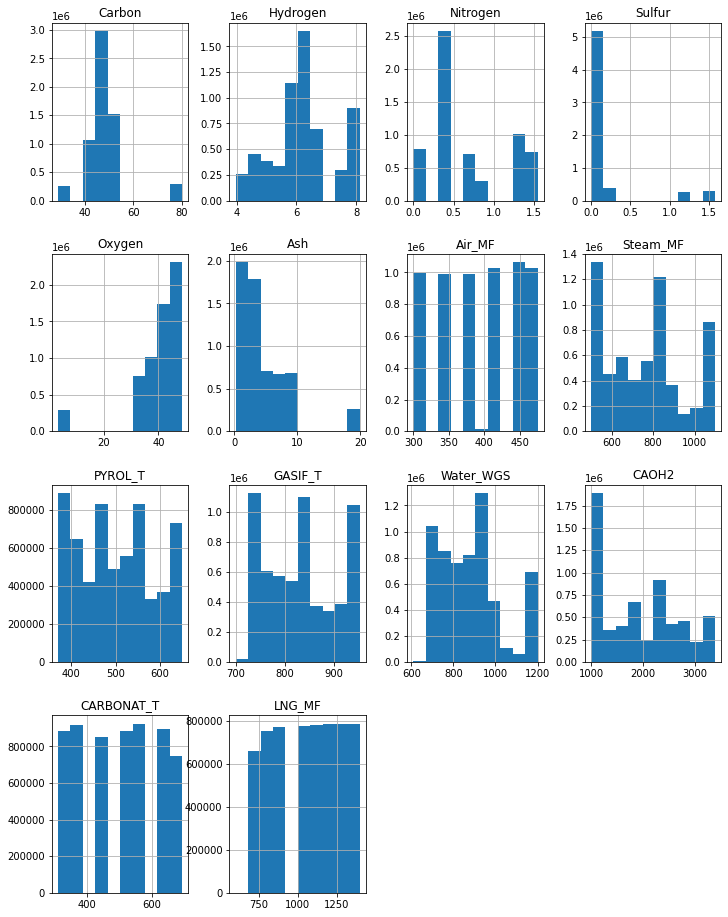

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

In [15]:
#sns.set()
#sns.pairplot(train[["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T","LNG_MF"]], size = 3)
#plt.show();

In [16]:
#f, ax = plt.subplots(7,2,figsize=(12,8))
#vis1 = sns.distplot(feature_vars["Carbon"],bins=20, ax= ax[0][0])
#vis2 = sns.distplot(feature_vars["Hydrogen"],bins=20, ax=ax[0][1])
#vis3 = sns.distplot(feature_vars["Nitrogen"],bins=20, ax=ax[1][0])
#vis4 = sns.distplot(feature_vars["Sulfur"],bins=20, ax=ax[1][1])
#vis1 = sns.distplot(feature_vars["Oxygen"],bins=20, ax= ax[2][0])
#vis2 = sns.distplot(feature_vars["Ash"],bins=20, ax=ax[2][1])
#vis3 = sns.distplot(feature_vars["Air_MF"],bins=20, ax=ax[3][0])
#vis4 = sns.distplot(feature_vars["Steam_MF"],bins=20, ax=ax[3][1])
#vis4 = sns.distplot(feature_vars["PYROL_T"],bins=20, ax=ax[4][1])
#vis1 = sns.distplot(feature_vars["GASIF_T"],bins=20, ax= ax[4][0])
#vis2 = sns.distplot(feature_vars["Water_WGS"],bins=20, ax=ax[5][1])
#vis3 = sns.distplot(feature_vars["CAOH2"],bins=20, ax=ax[5][0])
#vis4 = sns.distplot(feature_vars["CARBONAT_T"],bins=20, ax=ax[6][0])
#vis4 = sns.distplot(feature_vars["LNG_MF"],bins=20, ax=ax[6][1])

In [17]:
#f = plt.figure(figsize=(12,5))
#plt.xlabel('kg/hr')
#plt.ylabel('Frequency')
#sns.distplot(target_vars.LNG , bins=30 ) ;

<AxesSubplot:>

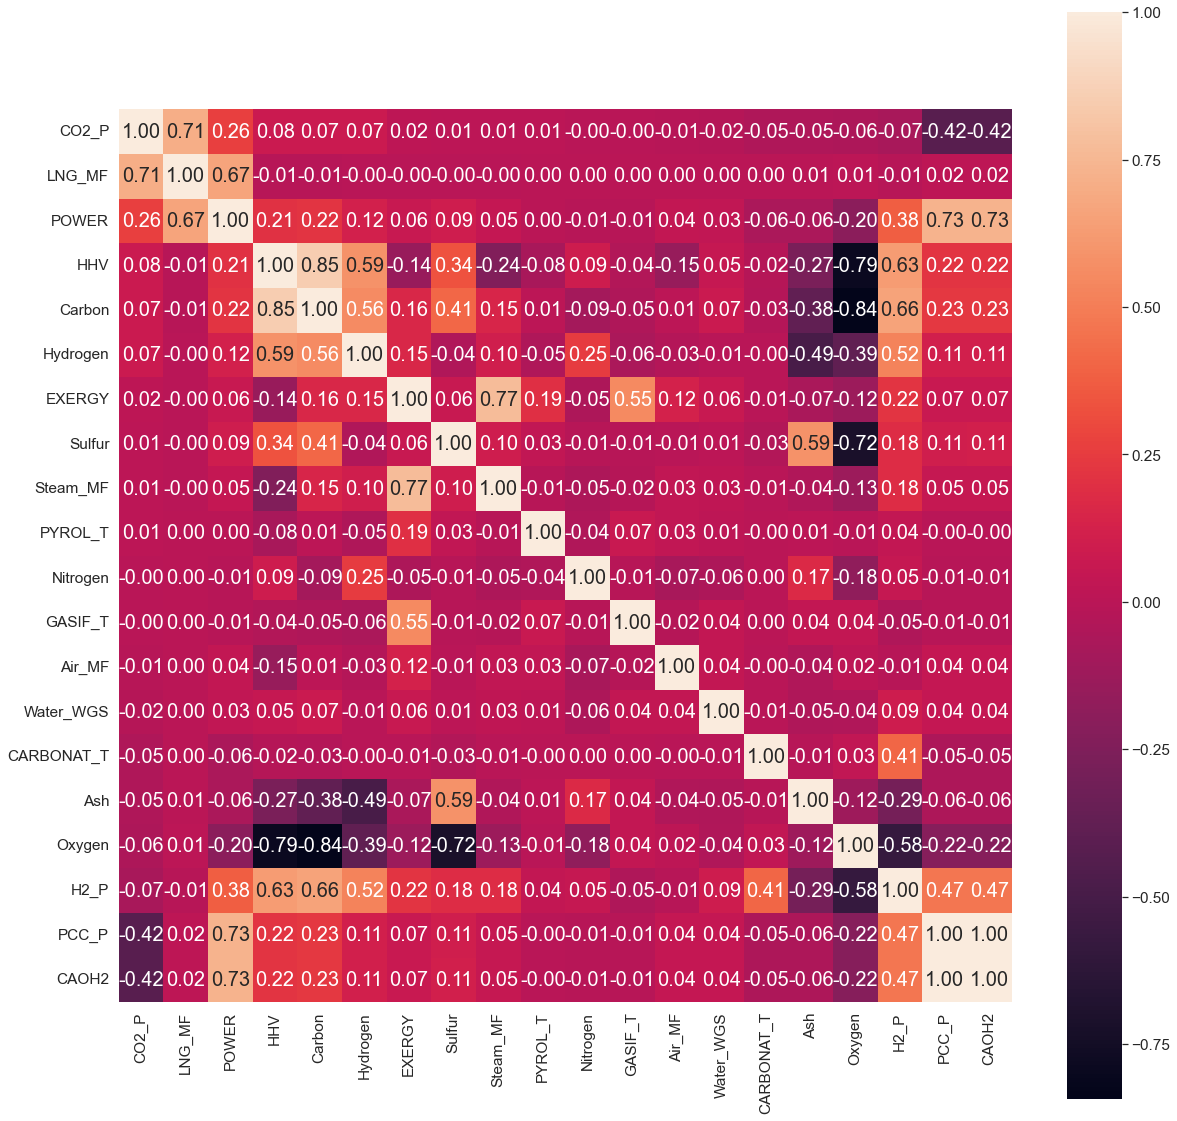

In [18]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'CO2_P')['CO2_P'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [19]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.shape

(6105378, 14)

In [20]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

test_X.shape

(2035126, 14)

In [21]:
train_X.columns


Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T',
       'LNG_MF'],
      dtype='object')

In [22]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T',
       'LNG_MF'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [24]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,CO2_P
4216715,-0.887618,-0.859633,-0.546695,-0.387803,0.633719,0.923629,1.445132,0.432394,-0.053844,-0.943399,0.695782,-1.175767,-1.491982,-0.703841,-0.215090
540004,-0.043494,0.140232,-0.703987,-0.362590,0.504904,-0.778678,0.271925,1.772815,1.625949,-0.588847,-0.229882,0.069466,1.045705,-1.588540,-0.879341
2117221,0.058398,1.835559,1.331369,-0.387803,-0.132912,-0.305815,0.858529,-1.320464,1.625949,0.120256,-0.229882,-0.782535,1.045705,1.065558,1.113412
8055076,3.674098,1.186387,-0.428726,3.595953,-4.060278,0.616268,-0.314678,0.226175,0.604453,0.120256,-0.891070,0.790391,1.045705,-0.261491,0.117036
1673972,0.222951,-0.415249,-1.333154,-0.387803,0.404960,-0.894530,1.445132,0.535503,-0.076544,-1.297950,-1.221665,0.397159,0.538168,1.065558,1.113412


In [25]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,CO2_P
5245,-0.041682,0.140343,-0.704229,-0.362676,0.504848,-0.778506,-1.488167,0.227486,0.603466,-1.298910,-1.221508,-1.175221,-1.492735,-0.262449,0.116525
709100,-0.041682,0.140343,-0.704229,-0.362676,0.504848,-0.778506,0.272334,-1.320848,-1.439535,1.538549,-0.560502,0.790896,-1.492735,-1.589376,-0.913454
6917622,0.141137,0.473410,0.318025,-0.211268,0.252162,-0.839858,-1.488167,0.898431,-0.758535,-0.589545,-0.229999,-1.175221,-0.477785,-0.704758,-0.215149
1357245,0.313608,0.297624,-0.586276,-0.337441,0.245483,-1.014474,0.272334,-0.804737,-0.758535,1.538549,2.083522,1.839491,-0.477785,-0.262449,-0.454714
1508266,0.225073,-0.414769,-1.333308,-0.387911,0.404664,-0.894131,0.859168,-0.030570,-1.099035,1.538549,2.083522,-1.175221,0.029690,0.179860,0.448200


In [26]:
train_X =  sc_train.drop(['CO2_P'] , axis=1)

test_X =  sc_test.drop(['CO2_P'] , axis=1)


In [27]:
train_X.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
4216715,-0.887618,-0.859633,-0.546695,-0.387803,0.633719,0.923629,1.445132,0.432394,-0.053844,-0.943399,0.695782,-1.175767,-1.491982,-0.703841
540004,-0.043494,0.140232,-0.703987,-0.362590,0.504904,-0.778678,0.271925,1.772815,1.625949,-0.588847,-0.229882,0.069466,1.045705,-1.588540
2117221,0.058398,1.835559,1.331369,-0.387803,-0.132912,-0.305815,0.858529,-1.320464,1.625949,0.120256,-0.229882,-0.782535,1.045705,1.065558
8055076,3.674098,1.186387,-0.428726,3.595953,-4.060278,0.616268,-0.314678,0.226175,0.604453,0.120256,-0.891070,0.790391,1.045705,-0.261491
1673972,0.222951,-0.415249,-1.333154,-0.387803,0.404960,-0.894530,1.445132,0.535503,-0.076544,-1.297950,-1.221665,0.397159,0.538168,1.065558


In [28]:
train_y.head()

,CO2_P
4216715,492.030203
540004,382.298959
2117221,711.492689
8055076,546.895870
1673972,711.492689


In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, TweedieRegressor, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [30]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet()],
           ['BayesianRidge: ', BayesianRidge()],
           ['TweedieRegressor: ', TweedieRegressor()],
           ['RANSACRegressor: ', RANSACRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [31]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [32]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 26.712502241134644,
  'Train_R2_Score': 0.7246751504064194,
  'Test_R2_Score': 0.7251247451941547,
  'Test_RMSE_Score': 86.72724353610775},
 {'Name': 'Ridge: ',
  'Train_Time': 0.7130296230316162,
  'Train_R2_Score': 0.7258997949763907,
  'Test_R2_Score': 0.7263333352811756,
  'Test_RMSE_Score': 86.53636939166387},
 {'Name': 'ElasticNet: ',
  'Train_Time': 2.6989314556121826,
  'Train_R2_Score': 0.636519329996508,
  'Test_R2_Score': 0.6364812527320908,
  'Test_RMSE_Score': 99.73581190561518},
 {'Name': 'BayesianRidge: ',
  'Train_Time': 3.326141357421875,
  'Train_R2_Score': 0.7258997949738146,
  'Test_R2_Score': 0.7263333351587705,
  'Test_RMSE_Score': 86.53636941101679},
 {'Name': 'TweedieRegressor: ',
  'Train_Time': 3.8135242462158203,
  'Train_R2_Score': 0.5346354167237207,
  'Test_R2_Score': 0.5344806753884586,
  'Test_RMSE_Score': 112.86429625032184},
 {'Name': 'RANSACRegressor: ',
  'Train_Time': 20.589872121810913,
  'Train_R2_Score': 0.479

In [33]:
df1 = pd.DataFrame(model_data)
df1

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,26.712502,0.724675,0.725125,86.727244
1,Ridge:,0.713030,0.725900,0.726333,86.536369
2,ElasticNet:,2.698931,0.636519,0.636481,99.735812
3,BayesianRidge:,3.326141,0.725900,0.726333,86.536369
4,TweedieRegressor:,3.813524,0.534635,0.534481,112.864296
5,RANSACRegressor:,20.589872,0.479499,0.480562,119.221471
6,KNeighborsRegressor:,89.641066,0.990210,0.985496,19.922252
7,RandomForest,2758.268350,0.999997,0.999491,3.732126
8,ExtraTreeRegressor :,3977.032299,1.000000,0.999960,1.047649
9,GradientBoostingClassifier:,2752.191178,0.971172,0.971081,28.130383


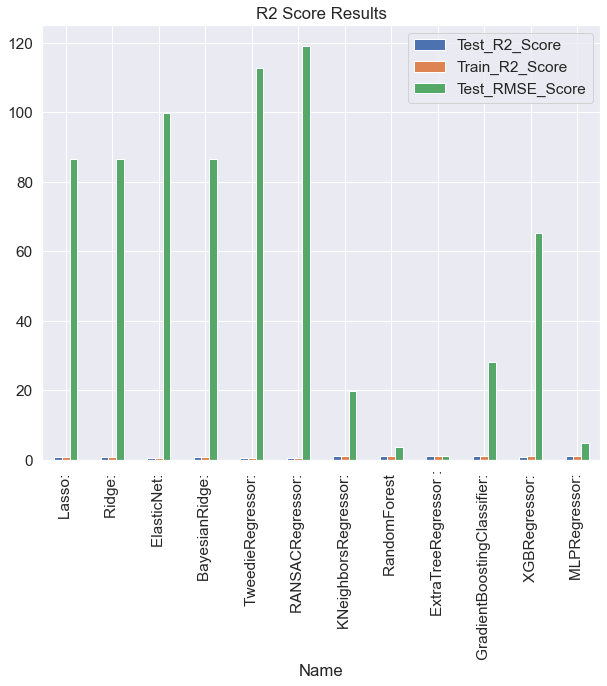

In [34]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [35]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200],
              'n_estimators' : [100,150,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


: 

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, n_estimators=200, random_state=40)

In [ ]:
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [ ]:
grid_search.best_estimator_.score(test_X,test_y)

0.9481632485181273

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

179.73038954607972

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

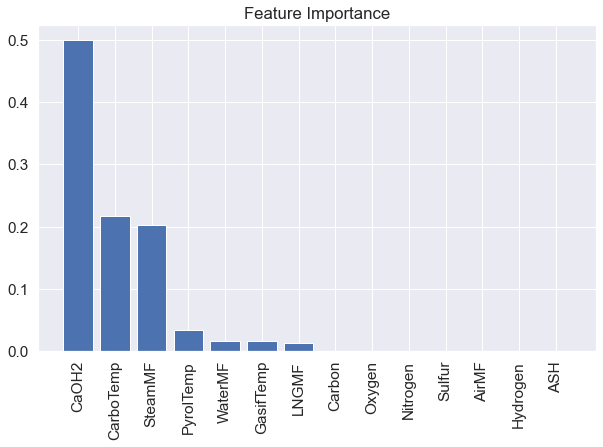

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
names[0:5]

['CaOH2', 'CarboTemp', 'SteamMF', 'PyrolTemp', 'WaterMF']

In [ ]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [ ]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, n_estimators=200, random_state=40)

In [ ]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.8496874927358102
Testing set R2 Score -  0.8277757332824176
Testing set RMSE Score -  188.16580024367354
